## Import packages and modules

In [1]:
from models.tda_models import TDA_PI34_Model, VECTOR_STITCHING_PI_Model
from models.raw_models import Raw_Model, Dummy_Model
from tda_pipelines import *


## Fetch dataset, prepare training and testing sets, generate distorted sets

In [2]:
# fetch data, prepare for pipeline and test models

from sklearn.datasets import fetch_openml 
import numpy as np
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(f"X shape: {X.shape}, y shape: {y.shape}")
train_size, test_size = 1000, 300 # Reshape to (n_samples, n_pixels_x, n_pixels_y) 
X = X.reshape((-1, 28, 28)) 
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=666 ) 
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}") 
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


# mnist comes with string labels, we need to convert them to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)


X shape: (70000, 784), y shape: (70000,)
X_train shape: (1000, 28, 28), y_train shape: (1000,)
X_test shape: (300, 28, 28), y_test shape: (300,)


Text(0.5, 1.0, 'Noisy Image with Random Noise')

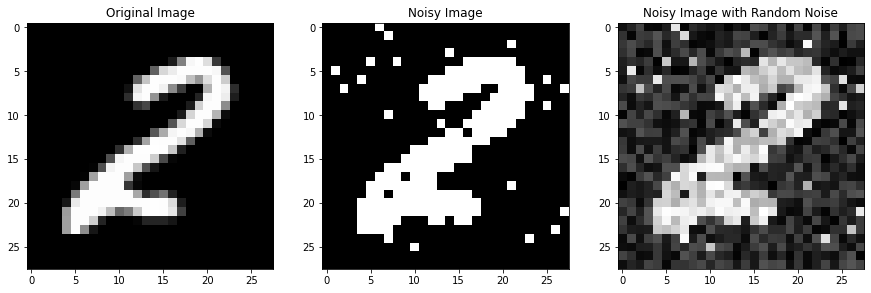

In [3]:
# distort X_train and X_test a little bit not using giotto
import matplotlib.pyplot as plt
from skimage.util import random_noise
X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)

# generate random noise matrix of size X_train_noisy.shape and X_test_noisy.shape but without original image

X_train_noisy_random = np.random.rand(*X_train_noisy.shape)
X_test_noisy_random = np.random.rand(*X_test_noisy.shape)

# for each image in X_train_noisy and X_test_noisy, we will add the random noise matrix to the image

X_train_noisy_random = X_train_noisy + X_train_noisy_random
X_test_noisy_random = X_test_noisy + 0.5*X_test_noisy_random

# plot the original image, the noisy image and the noisy image with random noise

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X_test[5], cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(X_test_noisy[5], cmap="gray")
ax[1].set_title("Noisy Image")
ax[2].imshow(X_test_noisy_random[5], cmap="gray")
ax[2].set_title("Noisy Image with Random Noise")


## Load TDA and Vector-stitching pipelines 

In [4]:
# load pipelines 

tda_pipeline = TDA_PI34_Pipeline()
vector_stitching_pipeline, tda_union = VECTOR_STITCHING_PI_Pipeline()


## Transform raw data to persistance images and stitched RAW-PI images

In [5]:
# clean data

X_train_clean_tda = tda_pipeline.fit_transform(X_train)
X_test_clean_tda = tda_pipeline.transform(X_test)

# distorted data
X_train_noisy_tda = tda_pipeline.fit_transform(X_train_noisy_random)
X_test_noisy_tda = tda_pipeline.transform(X_test_noisy_random)


In [6]:
print(X_train_clean_tda.shape)
print(X_test_clean_tda.shape)

(1000, 42, 28, 28)
(300, 42, 28, 28)


In [7]:

#important for initializing Binarizer
#X_training = tda_union.fit(X_train)

#clean data
X_train_clean_vector_stitching = vector_stitching_pipeline.fit_transform(X_train)
X_test_clean_vector_stitching = vector_stitching_pipeline.transform(X_test)

# distorted data
X_train_noisy_vector_stitching = vector_stitching_pipeline.fit_transform(X_train_noisy_random)
X_test_noisy_vector_stitching = vector_stitching_pipeline.transform(X_test_noisy_random)


In [8]:
# this needs to be integrated into pipeline, transposing the data to fit the input shape of the model

# normal tda
X_train_clean_tda_good = np.transpose(X_train_clean_tda, (0, 3, 2, 1))
X_test_clean_tda_good = np.transpose(X_test_clean_tda, (0, 3, 2, 1))

X_train_noisy_tda_good = np.transpose(X_train_noisy_tda, (0, 3, 2, 1))
X_test_noisy_tda_good = np.transpose(X_test_noisy_tda, (0, 3, 2, 1))

#stitched

X_train_clean_vector_stitching_good = np.transpose(X_train_clean_vector_stitching, (0, 3, 2, 1))
X_test_clean_vector_stitching_good = np.transpose(X_test_clean_vector_stitching, (0, 3, 2, 1))

X_train_noisy_vector_stitching_good = np.transpose(X_train_noisy_vector_stitching, (0, 3, 2, 1))
X_test_noisy_vector_stitching_good = np.transpose(X_test_noisy_vector_stitching, (0, 3, 2, 1))

# shapes
print(f"X_train_clean_tda_good shape: {X_train_clean_tda_good.shape}, X_test_clean_tda_good shape: {X_test_clean_tda_good.shape}")
print(f"X_train_noisy_tda_good shape: {X_train_noisy_tda_good.shape}, X_test_noisy_tda_good shape: {X_test_noisy_tda_good.shape}")
print(f"X_train_clean_vector_stitching_good shape: {X_train_clean_vector_stitching_good.shape}, X_test_clean_vector_stitching_good shape: {X_test_clean_vector_stitching_good.shape}")
print(f"X_train_noisy_vector_stitching_good shape: {X_train_noisy_vector_stitching_good.shape}, X_test_noisy_vector_stitching_good shape: {X_test_noisy_vector_stitching_good.shape}")



X_train_clean_tda_good shape: (1000, 28, 28, 42), X_test_clean_tda_good shape: (300, 28, 28, 42)
X_train_noisy_tda_good shape: (1000, 28, 28, 42), X_test_noisy_tda_good shape: (300, 28, 28, 42)
X_train_clean_vector_stitching_good shape: (1000, 56, 28, 42), X_test_clean_vector_stitching_good shape: (300, 56, 28, 42)
X_train_noisy_vector_stitching_good shape: (1000, 56, 28, 42), X_test_noisy_vector_stitching_good shape: (300, 56, 28, 42)


In [9]:
X_train_expanded, X_test_noisy_random_expanded, X_test_expanded = transform_data(X_train, X_test_noisy_random, X_test)

# Initialize models

In [10]:
# models

raw_model = Raw_Model() # cnn models working on raw images
dummy_model = Dummy_Model() # fully dense model working on raw images
tda_model = TDA_PI34_Model() # cnn model working on persistance images
vector_stitching_model = VECTOR_STITCHING_PI_Model() # cnn model working on stitched raw and PI images


## Fitting and validating models

All models are trained on clean data, and then validated on only distorted data (look up 2nd paragraph to see plotted example images)

In [11]:
#TDA model

tda_model.model.fit(X_train_clean_tda_good, y_train, epochs=20, batch_size=10, validation_data=(X_test_clean_tda_good, y_test))

Epoch 1/20
100/100 [==============================] - 1s 10ms/step - loss: 1.6816 - accuracy: 0.4590 - val_loss: 0.8896 - val_accuracy: 0.7233
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 0.7904 - accuracy: 0.7500 - val_loss: 0.4958 - val_accuracy: 0.8467
Epoch 3/20
100/100 [==============================] - 1s 9ms/step - loss: 0.5103 - accuracy: 0.8470 - val_loss: 0.4770 - val_accuracy: 0.8500
Epoch 4/20
100/100 [==============================] - 1s 9ms/step - loss: 0.3838 - accuracy: 0.8790 - val_loss: 0.5078 - val_accuracy: 0.8533
Epoch 5/20
100/100 [==============================] - 1s 9ms/step - loss: 0.3015 - accuracy: 0.9070 - val_loss: 0.4208 - val_accuracy: 0.8700
Epoch 6/20
100/100 [==============================] - 1s 9ms/step - loss: 0.2363 - accuracy: 0.9290 - val_loss: 0.4196 - val_accuracy: 0.8900
Epoch 7/20
100/100 [==============================] - 1s 9ms/step - loss: 0.2374 - accuracy: 0.9310 - val_loss: 0.3113 - val_accuracy: 0.9133
Epoch

In [12]:
# RAW model
raw_model.model.fit(X_train_expanded, y_train, epochs=20, batch_size=10, validation_data=(X_test_noisy_random_expanded, y_test))

Epoch 1/20
100/100 [==============================] - 1s 6ms/step - loss: 4.0743 - accuracy: 0.4960 - val_loss: 2.2943 - val_accuracy: 0.1433
Epoch 2/20
100/100 [==============================] - 1s 5ms/step - loss: 0.6362 - accuracy: 0.8000 - val_loss: 2.2930 - val_accuracy: 0.1400
Epoch 3/20
100/100 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8880 - val_loss: 2.2905 - val_accuracy: 0.1633
Epoch 4/20
100/100 [==============================] - 1s 5ms/step - loss: 0.2185 - accuracy: 0.9300 - val_loss: 2.2838 - val_accuracy: 0.2567
Epoch 5/20
100/100 [==============================] - 1s 5ms/step - loss: 0.1886 - accuracy: 0.9310 - val_loss: 2.2880 - val_accuracy: 0.1900
Epoch 6/20
100/100 [==============================] - 1s 5ms/step - loss: 0.1005 - accuracy: 0.9590 - val_loss: 2.2793 - val_accuracy: 0.2300
Epoch 7/20
100/100 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9650 - val_loss: 2.2854 - val_accuracy: 0.1433
Epoch 

In [13]:
#Vector stitching model

vector_stitching_model.model.fit(X_train_clean_vector_stitching_good, y_train, epochs=20, batch_size=10, validation_data=(X_test_clean_vector_stitching_good, y_test))

Epoch 1/20
100/100 [==============================] - 2s 17ms/step - loss: 1.3468 - accuracy: 0.5310 - val_loss: 0.3530 - val_accuracy: 0.9033
Epoch 2/20
100/100 [==============================] - 2s 15ms/step - loss: 0.4944 - accuracy: 0.8450 - val_loss: 0.2505 - val_accuracy: 0.9300
Epoch 3/20
100/100 [==============================] - 2s 15ms/step - loss: 0.3136 - accuracy: 0.9040 - val_loss: 0.1262 - val_accuracy: 0.9733
Epoch 4/20
100/100 [==============================] - 2s 16ms/step - loss: 0.2183 - accuracy: 0.9340 - val_loss: 0.1308 - val_accuracy: 0.9667
Epoch 5/20
100/100 [==============================] - 2s 15ms/step - loss: 0.1648 - accuracy: 0.9480 - val_loss: 0.1276 - val_accuracy: 0.9567
Epoch 6/20
100/100 [==============================] - 2s 15ms/step - loss: 0.1283 - accuracy: 0.9540 - val_loss: 0.1545 - val_accuracy: 0.9667
Epoch 7/20
100/100 [==============================] - 2s 15ms/step - loss: 0.1303 - accuracy: 0.9540 - val_loss: 0.1716 - val_accuracy: 0.9467